# TP3 - Grupo 20
###  Dezembro, 4, 2024

Afonso Martins Campos Fernandes - A102940

Luís Filipe Pinheiro Silva - A105530

## Problema 2

#### a) Construa um “Control Flow Automaton (CFA)” que determina este programa. Identifique os locais e as transições/ramos.  Numa abordagem orientada às pré-condições  identifique os transformadores de predicados associados aos vários locais e os “switches” associados aos vários ramos.

### 1) Objétivo:

Identificar os locais, transições e transformadores de predicados que estão associados a cada estado do sistema.

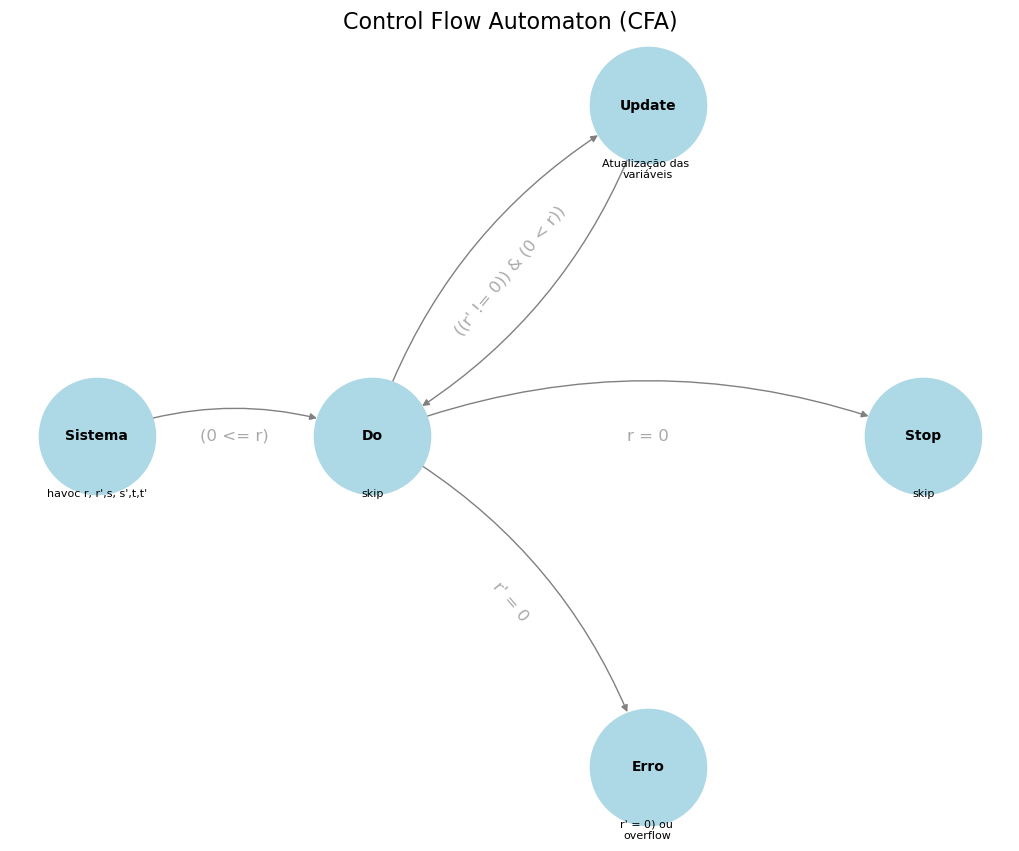

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Criação do grafo usando NetworkX
G = nx.DiGraph()

# Adicionando nós
G.add_node('Sistema', annotation="havoc r, r',s, s',t,t'")
G.add_node('Do', annotation='skip')
G.add_node('Update', annotation='Atualização das \nvariáveis')
G.add_node('Erro', annotation='r\' = 0) ou \noverflow')
G.add_node('Stop', annotation='skip')

# Adicionando arestas (transições)
G.add_edge('Sistema', 'Do', label='(0 <= r)')
G.add_edge('Do', 'Update', label='((!(r\' = 0)) & (0 < r))')
G.add_edge('Do', 'Erro', label='r\' = 0')
G.add_edge('Update', 'Do', label='((r\' != 0)) & (0 < r))')
G.add_edge('Do', 'Stop', label='r = 0')

# Posicionamento dos nós (usando um layout circular para clareza)
pos = nx.circular_layout(G)

# Desenhando o grafo sem labels externos
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray',connectionstyle="arc3,rad=-0.2")



# Adicionando rótulos nas arestas
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_weight='normal', font_color='darkgray')

annotations = nx.get_node_attributes(G, 'annotation')
for node, annotation in annotations.items():
    xp, yp = pos[node]
    plt.text(xp, yp-0.05, annotation, fontsize=8, ha='center', va='top')


# Exibindo o diagrama
plt.title('Control Flow Automaton (CFA)', fontsize=16)
plt.axis('off')  # Desativa o eixo para uma melhor visualização
plt.show()


### 2) Estrutura do CFA(Control Flow Automoton):

### 2.1) Locais/Estados:

1. Sistema: Estado Inicial, onde todas as variáveis são inicializadas de forma correta;

2. Do: Estado intermédio onde decisões são tomadas, como a verificação se (r_linha == 0 && r < 0) para se deslocar para o estado de erro, `pc = 3`, caso essa verificação não seja aceite passa para o esado de update das variáveis;

3. Update: Estado onde são efetuados cálculos e as variáveis são atualizadas de acordo com esses cálculos;

4. Erro: Estado de erro, que indica que houve uma falha no sistema;

5. Stop: Estado final do sistema, onde o sistema finaliza o seu processo;


### 2.2) Transições:

- Sistema -> Do: Transição inicial quando a condição `0 <= r` é aceite/verificada;
- Do -> Update: Transição para a atualização quando  a condição `(!(r_linha = 0) && (0 < r))` é aceite/verificada;
- Do -> Erro: Transição para o estado de erro quando a condição `r_linha = 0` é verificada;
- Update -> Do: Retorno para o estado Do se `r_linha != 0` e `r > 0` são aceites;
- Do -> Stop: Transição para o estado final quando `r = 0`;


### 3) Implementação do Grafo em NetworkX:

O grafo foi implementado a partir deste bloco em auxilio da bibliotec NetworkX em Python e visualizado com o Matplotlib


```py
import matplotlib.pyplot as plt
import networkx as nx

# Criação do grafo usando NetworkX
G = nx.DiGraph()

# Adicionando nós
G.add_node('Sistema', annotation="havoc r, r',s, s',t,t'")
G.add_node('Do', annotation='skip')
G.add_node('Update', annotation='Atualização das \nvariáveis')
G.add_node('Erro', annotation='r\' = 0) ou \noverflow')
G.add_node('Stop', annotation='skip')

# Adicionando arestas (transições)
G.add_edge('Sistema', 'Do', label='(0 <= r)')
G.add_edge('Do', 'Update', label='((!(r\' = 0)) & (0 < r))')
G.add_edge('Do', 'Erro', label='r\' = 0')
G.add_edge('Update', 'Do', label='((r\' != 0)) & (0 < r))')
G.add_edge('Do', 'Stop', label='r = 0')

# Posicionamento dos nós
pos = nx.circular_layout(G)

# Desenhando o grafo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=7000, node_color='lightblue',
        font_size=10, font_weight='bold', edge_color='gray',
        connectionstyle="arc3,rad=-0.2")

# Adicionando rótulos nas arestas
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_size=12, font_weight='normal',
                             font_color='darkgray')

annotations = nx.get_node_attributes(G, 'annotation')
for node, annotation in annotations.items():
    xp, yp = pos[node]
    plt.text(xp, yp-0.05, annotation, fontsize=8, ha='center', va='top')

# Exibindo o diagrama
plt.title('Control Flow Automaton (CFA)', fontsize=16)
plt.axis('off') 
plt.show()
```

### 4) Análise das Pré-condições e Predicados:

Pré-condições:

`(0 <= r)` e `(r_linha != 0)` são as pré-condições do sistema que definem quando uma transição pode acontecer.

Predicados:

No estado `Update`, as variáveis utilizadas são atualizadas conforme a lógica do sistema definida.


 

#### b) Construa em `z3` o sistema de equações que representa o comportamento deste sistema dinâmico sob o ponto de vista da prova de segurança e verifique a segurança do programa através da resolução (total ou parcial) deste sistema. Sugere-se (não é obrigatório mas é valorizado !), na alínea (a), uma representação do CFA através de  um grafo orientado  implementado  em `networkx`  e a sua compilação para o sistema de equações.

1) Objétivo:

Verificar a segurança do programa, que garanta que não chegue ao estado de erro durante a execução do sistema. 

In [2]:
from z3 import *
import networkx as nx

def graph_safety_z3(G, n):
    print(f"> A testar {n} iterações.")
    
    # Define variáveis simbólicas
    r, r_linha = Ints("r r_linha")
    s, s_linha = Ints("s s_linha")
    t, t_linha = Ints("t t_linha")
    q = Int("q")
    
    # Estado inicial do sistema
    do = BoolVal(True)  # Inicia como verdadeiro para permitir a primeira transição
    
    # Criar um solver Z3
    solver = Solver()
    
    # Iteração para verificar a segurança do sistema
    for i in range(n):
        print(f"> Iteração {i}: Verificando segurança do sistema.")
        
        # Lista de requisitos para verificar transições seguras
        req = []
        for source, target, data in G.edges(data=True):
            condition = data["condition"]
            if source == "do":
                if target == "error":
                    # Verifica se a condição leva a um estado de erro
                    req.append(Implies(condition, False))  # Não deve atingir erro
                elif target == "stop":
                    # Verifica se a condição leva ao estado de parada
                    req.append(Implies(condition, False))  # Parada interrompe a propagação
                elif target == "update":
                    # Atualiza as variáveis se a condição de atualização for verdadeira
                    new_do = And(
                        r_linha == r - q * r_linha,
                        s_linha == s - q * s_linha,
                        t_linha == t - q * t_linha,
                    )
                    req.append(Implies(condition, new_do))
        
        # Determinar o novo estado do sistema com base nos requisitos
        new_do = And(req)
        
        # Verificar se o estado estabilizou (não há mais mudanças)
        solver.push()
        solver.add(do != new_do)
        if solver.check() == unsat:  # Se `do == new_do`, significa que estabilizou
            print(f"> Iteração {i}: sistema seguro.")
            return
        solver.pop()
        
        # Atualizar o estado para a próxima iteração
        do = Or(do, new_do)
    
    print("> Não foram encontrados estados inseguros.")

# Criar um grafo de teste usando NetworkX
G = nx.DiGraph()
G.add_edge("system", "do", condition=BoolVal(True))  # Transição inicial sempre verdadeira
G.add_edge("do", "error", condition=Int("r_linha") == 0)  # Condição para estado de erro
G.add_edge("do", "stop", condition=Int("r") == 0)  # Condição para parar o sistema
G.add_edge("do", "update", condition=Int("r") > 0)  # Condição para atualizar variáveis

# Executar a função para verificar segurança com 10 iterações
graph_safety_z3(G, 10)

> A testar 10 iterações.
> Iteração 0: Verificando segurança do sistema.
> Iteração 1: Verificando segurança do sistema.
> Iteração 2: Verificando segurança do sistema.
> Iteração 3: Verificando segurança do sistema.
> Iteração 4: Verificando segurança do sistema.
> Iteração 5: Verificando segurança do sistema.
> Iteração 6: Verificando segurança do sistema.
> Iteração 7: Verificando segurança do sistema.
> Iteração 8: Verificando segurança do sistema.
> Iteração 9: Verificando segurança do sistema.
> Não foram encontrados estados inseguros.


2) **Estrutura do Sistema de Equações**:

2.1) **Definição das variáveis**:

O sistema é inicializado com a definição das variáveis: `r`, `r_linha`, `s`, `s_linha`, `t`, `t_linha` e `q`. E com a definição do estado `do` com o valor boleano _True_ para permitir a primeira transição.

2.2) **Solver**:

É criado um solver chamado "solver" para verificar as condições de segurança do sistema. 

```py
solver = Solver
```

2.3) **Iterações e Verificações**:

O sistema passa por várias iterações para verificar a segurança em cada passo do sistema. Para isso foi feito:

1. Requesitos das Transições:

    As transições são definidas com base nas condições extraidas do grafo, e as mesmas determinam se uma transição leva a um estado seguro ou inseguro(estado de erro, `pc = 3`)

2. Atualizações do Estado:

    Se a condição de atualização ( estado `update`) for verdadeira, as variáveis: `r_linha`, `s_linha` e `t_linha` são atualizadas

    ```py
    new_do = And(
    r_linha == r - q * r_linha,
    s_linha == s - q * s_linha,
    t_linha == t - q * t_linha,
)
    ```
    
3. Verificação de Estabilização:

    O solver criado verifica se o estado atual está estabilizado, indicando que não existem mais mudanças. Caso o solver determinar que o estado atual não muda (`unsat`), o sistema é considerado seguro
